<a href="https://colab.research.google.com/github/yuvalmay30/CV-Curriculum/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [3]:
def calculate_derivatives(image, ksize):
  grad_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=ksize)
  grad_y = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=ksize)

  return grad_x, grad_y


def generate_gradient_pair_images(image_path, output_file_path):
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  image_grad_x, image_grad_y = calculate_derivatives(image, 3)

  image_grad_x = cv2.normalize(image_grad_x, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  image_grad_y = cv2.normalize(image_grad_y, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

  image_gradient_pair = np.concatenate((image_grad_x, image_grad_y), axis=1)

  cv2.imwrite(output_file_path, image_gradient_pair)
  

In [10]:
def ps4_1_a():
  generate_gradient_pair_images('transA.jpg', 'output/ps4-1-a-1.jpg')
  generate_gradient_pair_images('simA.jpg', 'output/ps4-1-a-2.jpg')

ps4_1_a()

In [4]:
def get_gaussian_kernel_matrix(window_size = 5):
  pre_gaussian_kerner = np.zeros((window_size, window_size))
  pre_gaussian_kerner[int(window_size / 2), int(window_size / 2)] = 1.0

  gaussian_kernel = cv2.GaussianBlur(pre_gaussian_kerner, (window_size, window_size), 1)
  return gaussian_kernel


def sum_gaussian_kernel_in_window(image, x_center_index, y_center_index, half_window_size, gaussian_kernel):
  window = image[x_center_index - half_window_size : x_center_index + half_window_size + 1, 
                          y_center_index - half_window_size : y_center_index + half_window_size + 1]
  
  return np.sum(gaussian_kernel * window)

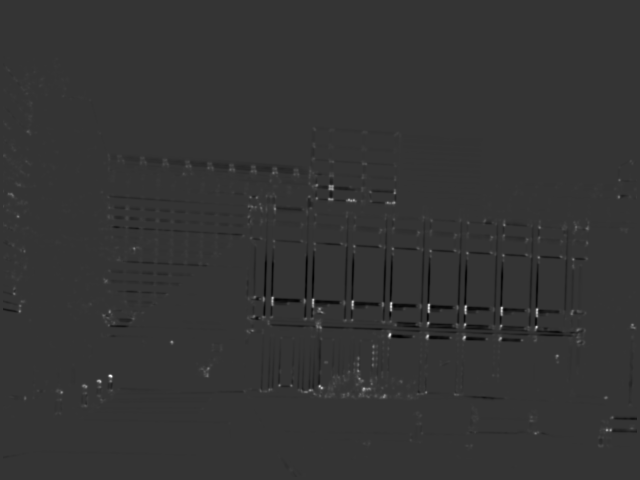

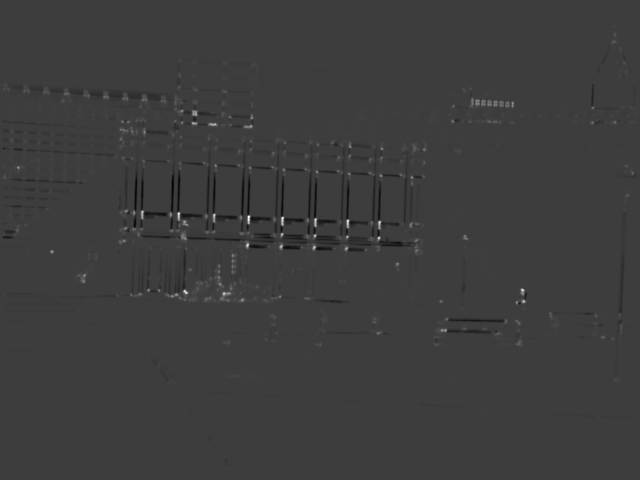

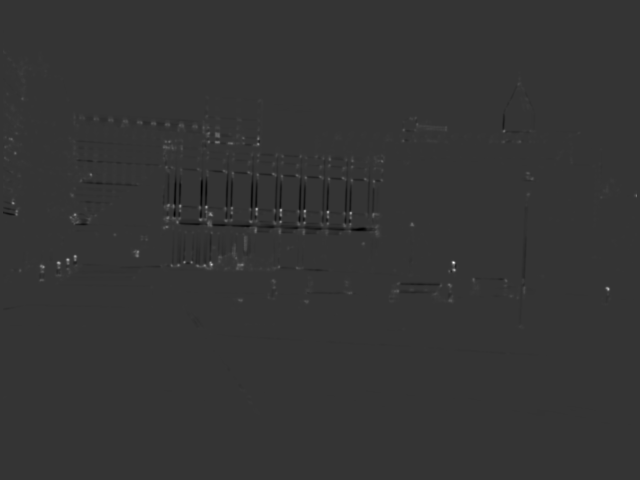

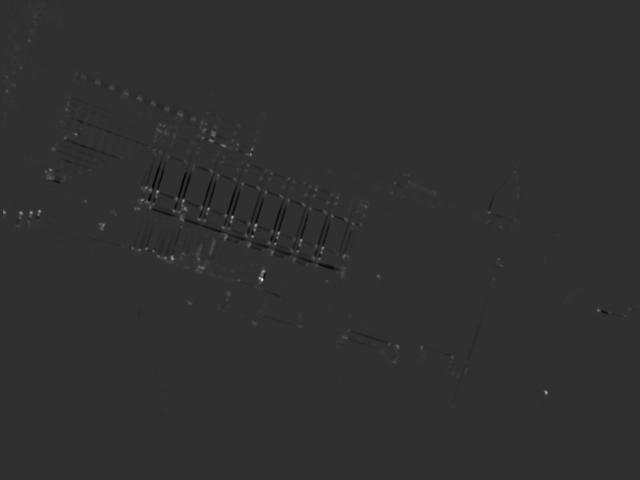

In [13]:
def create_R(image_path, output_file_path):
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  image_grad_x, image_grad_y = calculate_derivatives(image, 3)

  squared_grad_x = image_grad_x * image_grad_x 
  grad_x_multiply_grad_y = image_grad_x * image_grad_y
  squared_grad_y = image_grad_y * image_grad_y

  window_size = 7
  half_window_size = int(window_size / 2)

  gaussian_kernel = get_gaussian_kernel_matrix(window_size)

  R = np.zeros(image.shape, dtype=np.float32)
  alpha = 0.04

  for x_index in range(half_window_size, image.shape[0] - half_window_size):
    for y_index in range(half_window_size, image.shape[1] - half_window_size):
      summed_gaussed_squared_x = sum_gaussian_kernel_in_window(squared_grad_x, x_index, y_index, half_window_size, gaussian_kernel)
      summed_gaussed_squared_y = sum_gaussian_kernel_in_window(squared_grad_y, x_index, y_index, half_window_size, gaussian_kernel)
      summed_gaussed_grad_x_multiply_grad_y = sum_gaussian_kernel_in_window(
          grad_x_multiply_grad_y, x_index, y_index, half_window_size, gaussian_kernel)

      M = np.array([
           [summed_gaussed_squared_x, summed_gaussed_grad_x_multiply_grad_y],
           [summed_gaussed_grad_x_multiply_grad_y, summed_gaussed_squared_y]
           ])

      det_M = np.linalg.det(M)
      trace_M = np.trace(M)

      R[x_index, y_index] = det_M - alpha * np.power(trace_M, 2)
    

  norm_R = cv2.normalize(R, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

  cv2_imshow(norm_R)
  cv2.imwrite(output_file_path, norm_R)


def ps4_1_b():
  create_R('transA.jpg', 'output/ps4-1-b-1.jpg')
  create_R('transB.jpg', 'output/ps4-1-b-2.jpg')
  create_R('simA.jpg', 'output/ps4-1-b-3.jpg')
  create_R('simB.jpg', 'output/ps4-1-b-4.jpg')



ps4_1_b()